In [55]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pandas as pd
import os
import scipy.stats as sts

In [57]:
city_data_to_load = os.path.join("Resources/city_data.csv")
ride_data_to_load = os.path.join("Resources/ride_data.csv")

In [58]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [59]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [60]:
sum(city_data_df["type"] =="Rural")

18

In [61]:
# Merge the data into one dataframe for cities and rides
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [62]:
# What are the city types?
city_types = pyber_data_df["type"].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [63]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [64]:
# create ride counts per city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [65]:
# Find the average fares for each city within type of city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [66]:
# Find the average number of drivers per city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

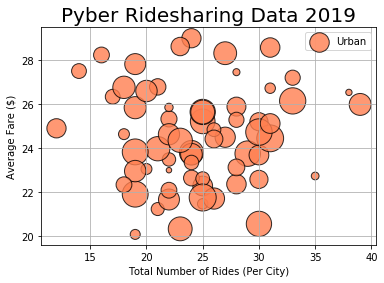

In [67]:
# Scatter plot for urban analysis
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, linewidths=1, edgecolor="black", c="coral", alpha=.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data 2019", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

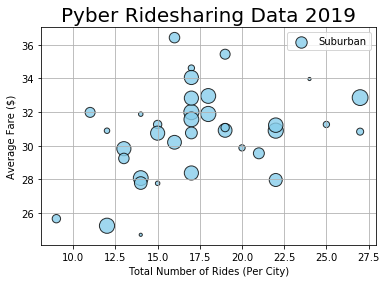

In [68]:
# Scatter plot for suburban analysis
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, linewidths=1, edgecolor="black", c="skyblue", alpha=.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data 2019", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

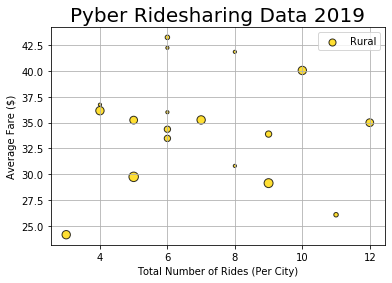

In [69]:
# Scatter plot for rural analysis
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, linewidths=1, edgecolor="black", c="gold", alpha=.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data 2019", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

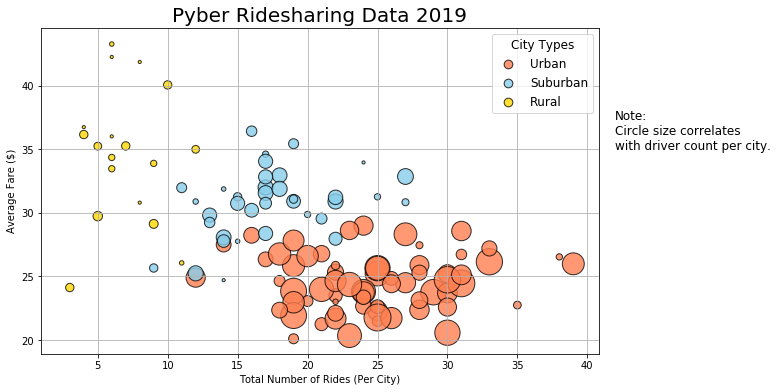

In [70]:
# Combine all the plots into one scatter 
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count*10, linewidths=1, edgecolor="black", c="coral", alpha=.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=suburban_driver_count*10, linewidths=1, edgecolor="black", c="skyblue", alpha=.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=rural_driver_count*10, linewidths=1, edgecolor="black", c="gold", alpha=.8, label="Rural")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data 2019", fontsize=20)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)
plt.savefig("analysis/Fig1.png")
plt.show()

In [71]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [72]:
round(suburban_ride_count.mode(), 2)

0    17
dtype: int64

In [74]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [78]:
urban_fares = urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
suburban_fares = suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [82]:
urban_drivers = urban_cities_df["driver_count"]
mean_urban_drivers = np.mean(urban_drivers)
print(f"The average number of drivers per urban city is {mean_urban_drivers:.2f}.")
suburban_drivers = suburban_cities_df["driver_count"]
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The average number of drivers per suburban city is {mean_suburban_drivers:.2f}.")
rural_drivers = rural_cities_df["driver_count"]
mean_rural_drivers = np.mean(rural_drivers)
print(f"The average number of drivers per rural city is {mean_rural_drivers:.2f}.")

The average number of drivers per urban city is 36.68.
The average number of drivers per suburban city is 13.71.
The average number of drivers per rural city is 4.30.


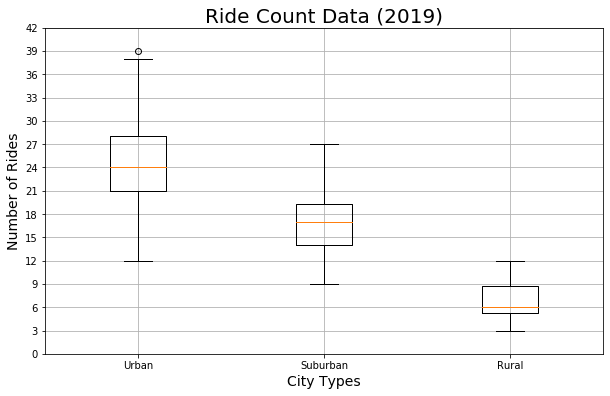

In [90]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()

In [91]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


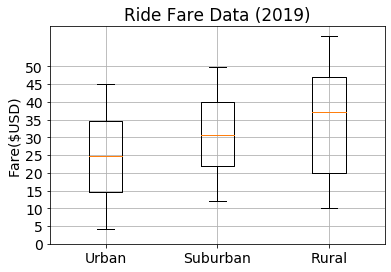

In [115]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()


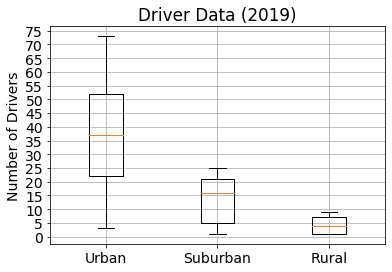

In [116]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [117]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares = pyber_data_df["fare"].sum()
print(f"Total fares: {total_fares}")
print(sum_fares_by_type)

Total fares: 63538.64
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [118]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

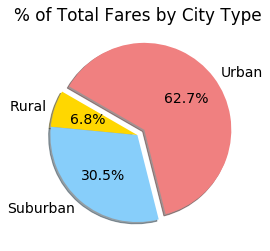

In [119]:
import matplotlib as mpl
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
plt.show()

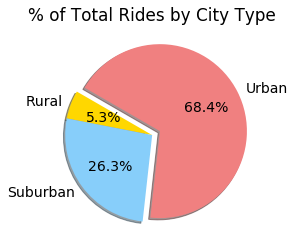

In [125]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")
plt.show()